In [4]:
!pip install folium

In [5]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import folium
from folium.plugins import HeatMap
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [6]:

file_path = "C:/Users/naveensurya/Downloads/archive (1)/US_Accidents_March23.csv"

# Read in chunks to handle large file
chunk_size = 100000  
df_chunks = pd.read_csv(file_path, chunksize=chunk_size)

df = next(df_chunks)
print(df.head())  

    ID   Source  Severity           Start_Time             End_Time  \
0  A-1  Source2         3  2016-02-08 05:46:00  2016-02-08 11:00:00   
1  A-2  Source2         2  2016-02-08 06:07:59  2016-02-08 06:37:59   
2  A-3  Source2         2  2016-02-08 06:49:27  2016-02-08 07:19:27   
3  A-4  Source2         3  2016-02-08 07:23:34  2016-02-08 07:53:34   
4  A-5  Source2         2  2016-02-08 07:39:07  2016-02-08 08:09:07   

   Start_Lat  Start_Lng  End_Lat  End_Lng  Distance(mi)  ... Roundabout  \
0  39.865147 -84.058723      NaN      NaN          0.01  ...      False   
1  39.928059 -82.831184      NaN      NaN          0.01  ...      False   
2  39.063148 -84.032608      NaN      NaN          0.01  ...      False   
3  39.747753 -84.205582      NaN      NaN          0.01  ...      False   
4  39.627781 -84.188354      NaN      NaN          0.01  ...      False   

  Station   Stop Traffic_Calming Traffic_Signal Turning_Loop Sunrise_Sunset  \
0   False  False           False          F

In [7]:
df_sample = df.sample(n=5000)
df_sample.to_csv("sample_accident.csv",index=False)


In [8]:
df.head()

ID   Source  Severity           Start_Time             End_Time  \
0  A-1  Source2         3  2016-02-08 05:46:00  2016-02-08 11:00:00   
1  A-2  Source2         2  2016-02-08 06:07:59  2016-02-08 06:37:59   
2  A-3  Source2         2  2016-02-08 06:49:27  2016-02-08 07:19:27   
3  A-4  Source2         3  2016-02-08 07:23:34  2016-02-08 07:53:34   
4  A-5  Source2         2  2016-02-08 07:39:07  2016-02-08 08:09:07   

   Start_Lat  Start_Lng  End_Lat  End_Lng  Distance(mi)  ... Roundabout  \
0  39.865147 -84.058723      NaN      NaN          0.01  ...      False   
1  39.928059 -82.831184      NaN      NaN          0.01  ...      False   
2  39.063148 -84.032608      NaN      NaN          0.01  ...      False   
3  39.747753 -84.205582      NaN      NaN          0.01  ...      False   
4  39.627781 -84.188354      NaN      NaN          0.01  ...      False   

  Station   Stop Traffic_Calming Traffic_Signal Turning_Loop Sunrise_Sunset  \
0   False  False           False          False        False          Night   
1   False  False           False          False        False          Night   
2   False  False           False           True        False          Night   
3   False  False           False          False        False          Night   
4   False  False           False           True        False            Day   

  Civil_Twilight Nautical_Twilight Astronomical_Twilight  
0          Night             Night                 Night  
1          Night             Night                   Day  
2          Night               Day                   Day  
3            Day               Day                   Day  
4            Day               Day                   Day  

[5 rows x 46 columns]

In [9]:
df.columns

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [10]:
df.isnull().sum()

ID                            0
Source                        0
Severity                      0
Start_Time                    0
End_Time                      0
Start_Lat                     0
Start_Lng                     0
End_Lat                  100000
End_Lng                  100000
Distance(mi)                  0
Description                   0
Street                        0
City                          1
County                        0
State                         0
Zipcode                       7
Country                       0
Timezone                      7
Airport_Code                  7
Weather_Timestamp          1054
Temperature(F)             1591
Wind_Chill(F)             95678
Humidity(%)                1856
Pressure(in)               1292
Visibility(mi)             1846
Wind_Direction             1064
Wind_Speed(mph)           23820
Precipitation(in)         92632
Weather_Condition          1604
Amenity                       0
Bump                          0
Crossing

In [11]:
df.describe()

Severity      Start_Lat      Start_Lng  End_Lat  End_Lng  \
count  100000.000000  100000.000000  100000.000000      0.0      0.0   
mean        2.448120      35.630369    -119.322756      NaN      NaN   
std         0.499931       2.101259       3.663525      NaN      NaN   
min         1.000000      32.542587    -123.813927      NaN      NaN   
25%         2.000000      33.957775    -121.828468      NaN      NaN   
50%         2.000000      34.168579    -118.384232      NaN      NaN   
75%         3.000000      37.776682    -117.916023      NaN      NaN   
max         4.000000      41.428753     -81.550728      NaN      NaN   

        Distance(mi)  Temperature(F)  Wind_Chill(F)   Humidity(%)  \
count  100000.000000    98409.000000    4322.000000  98144.000000   
mean        0.011345       66.641262      48.845812     59.794170   
std         0.262244       12.703846      19.898270     23.184442   
min         0.000000        3.200000      -8.400000      4.000000   
25%         0.000000       57.900000      37.100000     43.000000   
50%         0.000000       66.000000      42.500000     62.000000   
75%         0.010000       75.000000      63.000000     78.000000   
max        51.130000      114.100000     107.000000    100.000000   

       Pressure(in)  Visibility(mi)  Wind_Speed(mph)  Precipitation(in)  
count  98708.000000    98154.000000     76180.000000        7368.000000  
mean      29.961021        9.338639         8.044165           0.025786  
std        0.275672        1.885828         4.298926           0.051695  
min        2.980000        0.100000         0.000000           0.000000  
25%       29.890000       10.000000         4.600000           0.000000  
50%       29.970000       10.000000         6.900000           0.000000  
75%       30.060000       10.000000        10.400000           0.030000  
max       33.040000       80.000000       241.700000           0.550000

In [12]:
plt.style.use('seaborn-v0_8')
sns.set(font_scale=1.2)

   Weather_Condition
0         Light Rain
1         Light Rain
2           Overcast
3      Mostly Cloudy
4      Mostly Cloudy
5         Light Rain
6           Overcast
7           Overcast
8      Mostly Cloudy
9         Light Rain
10              Rain
11        Light Rain
12          Overcast
13     Mostly Cloudy
14        Light Rain
15          Overcast
16     Mostly Cloudy
17     Mostly Cloudy
18          Overcast
19     Mostly Cloudy


In [27]:
# Convert datetime if not already
df['Start_Time'] = pd.to_datetime(df['Start_Time'])
df['Hour'] = df['Start_Time'].dt.hour

In [29]:
plt.figure(figsize=(10, 5))
sns.countplot(x='Hour', data=df, palette='mako')
plt.title('Accidents by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Number of Accidents')
plt.grid(True)
plt.show()

C:\Users\naveensurya\AppData\Local\Temp\ipykernel_31648\2702817373.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Hour', data=df, palette='mako')


In [31]:
weather_condition_df = pd.DataFrame(df['Weather_Condition'])
print(weather_condition_df.head(20))

   Weather_Condition
0         Light Rain
1         Light Rain
2           Overcast
3      Mostly Cloudy
4      Mostly Cloudy
5         Light Rain
6           Overcast
7           Overcast
8      Mostly Cloudy
9         Light Rain
10              Rain
11        Light Rain
12          Overcast
13     Mostly Cloudy
14        Light Rain
15          Overcast
16     Mostly Cloudy
17     Mostly Cloudy
18          Overcast
19     Mostly Cloudy


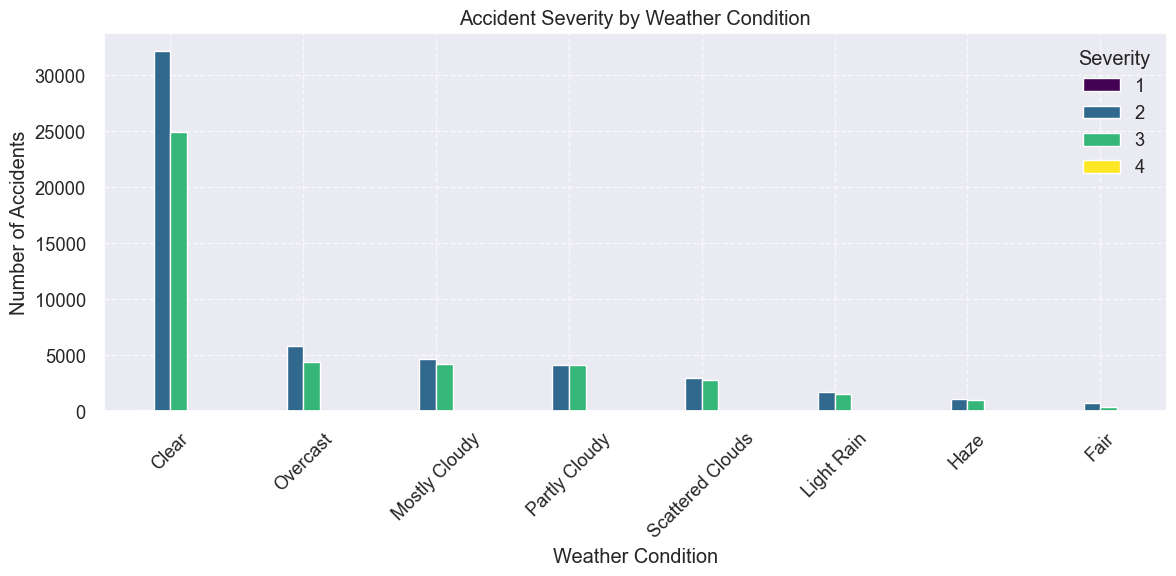

In [63]:
severity_weather = df.groupby(['Weather_Condition', 'Severity']).size().unstack().fillna(0)
top_weather = severity_weather.sum(axis=1).nlargest(8).index
severity_weather = severity_weather.loc[top_weather]
# Plot
severity_weather.plot(kind='bar', figsize=(12, 6), colormap='viridis')
plt.title('Accident Severity by Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.legend(title='Severity')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

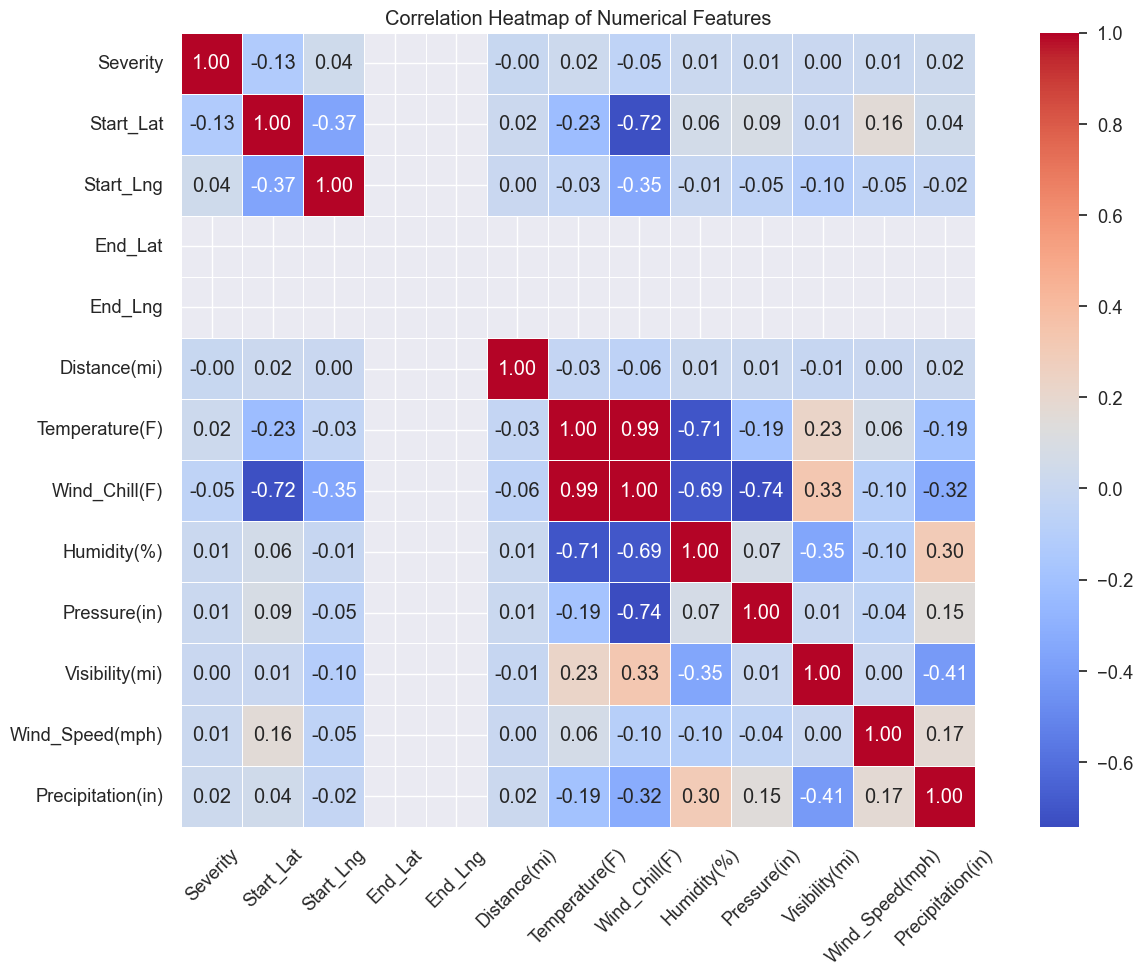

In [78]:
numerical_cols = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numerical_cols.corr()
# Plot the heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()